### Numpy array vs Python lists

In [11]:
# speed
# list
a = [i for i in range(10000000)]
b = [i for i in range(10000000,20000000)]

c = []
import time

start = time.time()
for i in range(len(a)):
  c.append(a[i] + b[i])
print(time.time()-start)

1.9629828929901123


In [10]:
# numpy
import numpy as np
a = np.arange(10000000)
b = np.arange(10000000,20000000)

start = time.time()
c = a + b
print(time.time()-start)

0.020169496536254883


In [15]:
3.26/0.06

54.33333333333333

In [16]:
# memory
a = [i for i in range(10000000)]
import sys

sys.getsizeof(a)

89095160

In [18]:
a = np.arange(10000000,dtype=np.int32)
sys.getsizeof(a)

40000112

In [17]:
# convenience
89095160/10000104

8.909423341997243

### Advanced Indexing

In [20]:
# Normal Indexing and slicing

a = np.arange(24).reshape(6,4)
print(a)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]


In [22]:
a[1,2]

6

In [23]:
a[1:3,1:3]

array([[ 5,  6],
       [ 9, 10]])

In [26]:
# Fancy Indexing

a[4:,[1,2]]

array([[17, 18],
       [21, 22]])

In [27]:
# Boolean Indexing
a = np.random.randint(1,100,24).reshape(6,4)
a

array([[97, 30, 28, 69],
       [ 9, 44, 51, 11],
       [82, 34,  9, 67],
       [81,  1, 55, 14],
       [99, 73, 60, 65],
       [56, 99, 88, 36]])

In [29]:
# find all numbers greater than 50
a[a>12]

array([97, 30, 28, 69, 44, 51, 82, 34, 67, 81, 55, 14, 99, 73, 60, 65, 56,
       99, 88, 36])

In [30]:
# find out even numbers
a[a % 2 == 0]

array([30, 28, 44, 82, 34, 14, 60, 56, 88, 36])

In [34]:
# find all numbers greater than 50 and are even
a[a>60] & a[a % 2 ==0]

array([ 0,  4,  0, 66,  0,  2,  8,  0, 64,  0])

In [33]:
# find all numbers not divisible by 7
a[~(a % 7 == 0)]

array([97, 30, 69,  9, 44, 51, 11, 82, 34,  9, 67, 81,  1, 55, 99, 73, 60,
       65, 99, 88, 36])

### Broadcasting

The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations.

The smaller array is “broadcast” across the larger array so that they have compatible shapes.

In [35]:
# same shape
a = np.arange(6).reshape(2,3)
b = np.arange(6,12).reshape(2,3)

print(a)
print(b)

print(a+b)

[[0 1 2]
 [3 4 5]]
[[ 6  7  8]
 [ 9 10 11]]
[[ 6  8 10]
 [12 14 16]]


In [37]:
# diff shape
a = np.arange(6).reshape(2,3)
b = np.arange(3).reshape(1,3)

print(a)
print(b)

print(a+b)

[[0 1 2]
 [3 4 5]]
[[0 1 2]]
[[0 2 4]
 [3 5 7]]


#### Broadcasting Rules

**1. Make the two arrays have the same number of dimensions.**<br>
- If the numbers of dimensions of the two arrays are different, add new dimensions with size 1 to the head of the array with the smaller dimension.<br>

**2. Make each dimension of the two arrays the same size.**<br>
- If the sizes of each dimension of the two arrays do not match, dimensions with size 1 are stretched to the size of the other array.
- If there is a dimension whose size is not 1 in either of the two arrays, it cannot be broadcasted, and an error is raised.

<img src = "https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png">

In [38]:
# More examples

a = np.arange(12).reshape(4,3)
b = np.arange(3)

print(a)
print(b)

print(a+b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[0 1 2]
[[ 0  2  4]
 [ 3  5  7]
 [ 6  8 10]
 [ 9 11 13]]


In [40]:
a = np.arange(12).reshape(3,4)
b = np.arange(3)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[0 1 2]


ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

In [ ]:
a = np.arange(3).reshape(1,3)
b = np.arange(3).reshape(3,1)

print(a)
print(b)

print(a+b)

[[0 1 2]]
[[0]
 [1]
 [2]]
[[0 1 2]
 [1 2 3]
 [2 3 4]]


In [ ]:
a = np.arange(3).reshape(1,3)
b = np.arange(4).reshape(4,1)

print(a)
print(b)

print(a + b)

[[0 1 2]]
[[0]
 [1]
 [2]
 [3]]
[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]]


In [ ]:
a = np.array([1])
# shape -> (1,1)
b = np.arange(4).reshape(2,2)
# shape -> (2,2)

print(a)
print(b)

print(a+b)

[1]
[[0 1]
 [2 3]]
[[1 2]
 [3 4]]


In [ ]:
a = np.arange(12).reshape(3,4)
b = np.arange(12).reshape(4,3)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


ValueError: ignored

In [ ]:
a = np.arange(16).reshape(4,4)
b = np.arange(4).reshape(2,2)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[0 1]
 [2 3]]


ValueError: ignored

### Working with mathematical formulas

In [ ]:
a = np.arange(10)
np.sin(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

In [50]:
# sigmoid
def sigmoid(array):
  return 16/(2 + np.exp(-(array)))


a = np.arange(100)

sigmoid(a)

array([5.33333333, 6.75710077, 7.49296849, 7.80568882, 7.92740228,
       7.97313871, 7.99009726, 7.99635413, 7.99865837, 7.99950639,
       7.9998184 , 7.99993319, 7.99997542, 7.99999096, 7.99999667,
       7.99999878, 7.99999955, 7.99999983, 7.99999994, 7.99999998,
       7.99999999, 8.        , 8.        , 8.        , 8.        ,
       8.        , 8.        , 8.        , 8.        , 8.        ,
       8.        , 8.        , 8.        , 8.        , 8.        ,
       8.        , 8.        , 8.        , 8.        , 8.        ,
       8.        , 8.        , 8.        , 8.        , 8.        ,
       8.        , 8.        , 8.        , 8.        , 8.        ,
       8.        , 8.        , 8.        , 8.        , 8.        ,
       8.        , 8.        , 8.        , 8.        , 8.        ,
       8.        , 8.        , 8.        , 8.        , 8.        ,
       8.        , 8.        , 8.        , 8.        , 8.        ,
       8.        , 8.        , 8.        , 8.        , 8.     

In [51]:
# mean squared error

actual = np.random.randint(1,50,25)
predicted = np.random.randint(1,50,25)

In [61]:
def mse(actual,predicted):
  return np.mean((actual - predicted)**2)

mse(actual,predicted)

421.32

In [58]:
# binary cross entropy
np.mean((actual - predicted)**2)

421.32

In [63]:
actual

array([ 9, 38, 29, 26, 10, 29, 23, 22, 10,  3, 31,  7, 21, 31,  6, 27, 38,
       13, 12, 46, 49, 35, 38, 23,  6])

### Working with missing values

In [74]:
# Working with missing values -> np.nan
a = np.array([1,np.nan,3,4,np.nan,6])
a

array([ 1., nan,  3.,  4., nan,  6.])

In [76]:
a[~np.isnan(a)]

array([1., 3., 4., 6.])

### Plotting Graphs

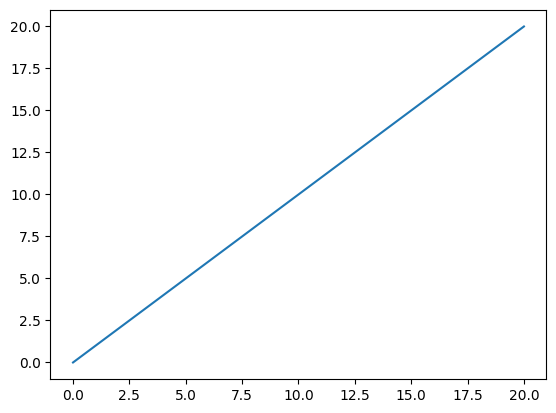

In [71]:
# plotting a 2D plot
# x = y
import matplotlib.pyplot as plt

x = np.linspace(0,20,100)
y = x

plt.plot(x,y)

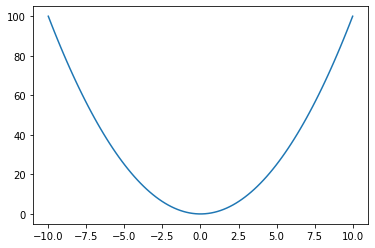

In [ ]:
# y = x^2
x = np.linspace(-10,10,100)
y = x**2

plt.plot(x,y)

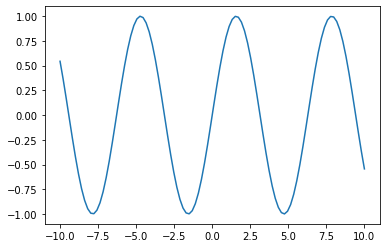

In [ ]:
# y = sin(x)
x = np.linspace(-10,10,100)
y = np.sin(x)

plt.plot(x,y)

<ipython-input-137-4b3958c08378>:3: RuntimeWarning: invalid value encountered in log
  y = x * np.log(x)


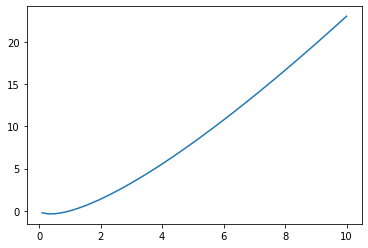

In [ ]:
# y = xlog(x)
x = np.linspace(-10,10,100)
y = x * np.log(x)

plt.plot(x,y)

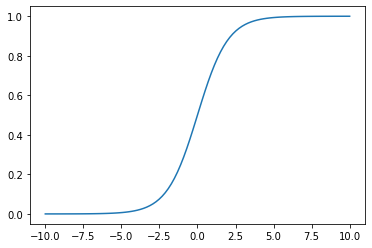

In [ ]:
# sigmoid
x = np.linspace(-10,10,100)
y = 1/(1+np.exp(-x))

plt.plot(x,y)

### Meshgrids

In [ ]:
# Meshgrids